Tomato plant leaf disease detection
1. Can add Data Augmentation step

In [ ]:
#Importing Libraries
%matplotlib inline
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import torchvision
from torchvision import datasets
from torchvision import models
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import glob
import time
import copy
#!pip install split-folders
#!pip install torchsummary

print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [ ]:
#Using GPU
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [ ]:
#Mounting from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train Section

In [ ]:
#Counts for Bacterial_spot

#for bacterial_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Bacterial_spot/*', recursive=True):
 # os.rename(bacterial_spot_file,bacterial_spot_file[:-3]+'.jpg')
trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Bacterial_spot/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Bacterial_spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Bacterial_spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Bacterial_spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Bacterial_spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Bacterial_spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)


Training samples for Bacterial_spot:  1701
Validation samples for Bacterial_spot:  212
Testing samples for Bacterial_spot:  214
Total Samples:  2127


In [ ]:
#Counts for Tomato___Early_blight

#for early_blight_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Early_blight/*', recursive=True):
 # os.rename(early_blight_file,early_blight_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Early_blight/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Early_blight: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Early_blight/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Early_blight: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Early_blight/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Early_blight: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Early_blight:  800
Validation samples for Tomato___Early_blight:  100
Testing samples for Tomato___Early_blight:  100
Total Samples:  1000


check

In [ ]:
#Counts for Tomato___Late_blight

#for late_blight_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Late_blight/*', recursive=True):
 # os.rename(late_blight_file,late_blight_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Late_blight/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Late_blight: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Late_blight/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Late_blight: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Late_blight/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Late_blight: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)



Training samples for Tomato___Late_blight:  1527
Validation samples for Tomato___Late_blight:  190
Testing samples for Tomato___Late_blight:  192
Total Samples:  1909


In [ ]:
#Counts for Tomato___Leaf_Mold

#for leaf_mold_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(leaf_mold_file,leaf_mold_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Leaf_Mold: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Leaf_Mold: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Leaf_Mold/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Leaf_Mold: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)


Training samples for Tomato___Leaf_Mold:  800
Validation samples for Tomato___Leaf_Mold:  100
Testing samples for Tomato___Leaf_Mold:  100
Total Samples:  1000


In [ ]:
#Counts for Tomato___Septoria_leaf_spot

#for septoria_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Septoria_leaf_spot/*', recursive=True):
 #os.rename(septoria_spot_file,septoria_spot_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Septoria_leaf_spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Septoria_leaf_spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Septoria_leaf_spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Septoria_leaf_spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Septoria_leaf_spot:  1416
Validation samples for Tomato___Septoria_leaf_spot:  177
Testing samples for Tomato___Septoria_leaf_spot:  178
Total Samples:  1771


In [ ]:
#Counts for Tomato___Spider_mites Two-spotted_spider_mite

#for spider_mites_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(spider_mites_file,spider_mites_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Spider_mites Two-spotted_spider_mite: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Spider_mites Two-spotted_spider_mite: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Spider_mites Two-spotted_spider_mite/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Spider_mites Two-spotted_spider_mite: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Spider_mites Two-spotted_spider_mite:  1348
Validation samples for Tomato___Spider_mites Two-spotted_spider_mite:  168
Testing samples for Tomato___Spider_mites Two-spotted_spider_mite:  170
Total Samples:  1686


In [ ]:
#Counts for Tomato___Target_Spot

#for target_spot_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Target_Spot/*', recursive=True):
  #os.rename(target_spot_file,target_spot_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Target_Spot/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Target_Spot: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Target_Spot/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Target_Spot: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Target_Spot/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Target_Spot: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Target_Spot:  1123
Validation samples for Tomato___Target_Spot:  140
Testing samples for Tomato___Target_Spot:  141
Total Samples:  1404


Increase check

In [ ]:
#Counts for Tomato___Tomato_Yellow_Leaf_Curl_Virus

#for curl_virus_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(curl_virus_file,curl_virus_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  4285
Validation samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  535
Testing samples for Tomato___Tomato_Yellow_Leaf_Curl_Virus:  537
Total Samples:  5357


In [ ]:
#Counts for Tomato___Tomato_mosaic_virus

#for mosaic_virus_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(mosaic_virus_file,mosaic_virus_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___Tomato_mosaic_virus: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___Tomato_mosaic_virus: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___Tomato_mosaic_virus/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___Tomato_mosaic_virus: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___Tomato_mosaic_virus:  808
Validation samples for Tomato___Tomato_mosaic_virus:  101
Testing samples for Tomato___Tomato_mosaic_virus:  101
Total Samples:  1010


In [ ]:
#Counts for Tomato___healthy

#for healthy_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset/Train/Tomato___healthy/*', recursive=True):
  #os.rename(healthy_file,healthy_file[:-3]+'.jpg')

trainSamples = 0
for trainSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/Tomato___healthy/*', recursive=True):
  #os.rename(trainSamples_file,trainSamples_file[:-3]+'.JPG')
  trainSamples=trainSamples+1
  #print(bacterial_spot_file)
print('Training samples for Tomato___healthy: ',trainSamples)

validSamples = 0
for validSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/Tomato___healthy/*', recursive=True):
  #os.rename(validSamples_file,validSamples_file[:-3]+'.JPG')
  validSamples=validSamples+1
  #print(bacterial_spot_file)
print('Validation samples for Tomato___healthy: ',validSamples)

testSamples = 0
for testSamples_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/Tomato___healthy/*', recursive=True):
  #os.rename(testSamples_file ,testSamples_file [:-3]+'.JPG')
  testSamples=testSamples+1
  #print(bacterial_spot_file)
print('Testing samples for Tomato___healthy: ',testSamples)

print('Total Samples: ', trainSamples+validSamples+testSamples)

Training samples for Tomato___healthy:  1272
Validation samples for Tomato___healthy:  159
Testing samples for Tomato___healthy:  160
Total Samples:  1591


In [ ]:
train=0
for train_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/train/**/*', recursive=True):
  train=train+1
print('Training: ',train)

valid=0
for valid_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/val/**/*', recursive=True):
  valid=valid+1
print('Validation: ',valid)

test=0
for test_file in glob.iglob('/content/drive/MyDrive/Tomato disease dataset new/test/**/*', recursive=True):
  test=test+1
print('Testing : ',test)

print("Total: ", train+valid+test)

Training:  15090
Validation:  1892
Testing :  1903
Total:  18885


In [ ]:
'''original =0
for original_file in glob.iglob('/content/drive/MyDrive/Original PlantVillage Tomato disease dataset/**/*', recursive=True):
  #os.rename(original_file,original_file[:-3]+'.JPG')
  original=original+1
print('Original : ',original)'''

"original =0\nfor original_file in glob.iglob('/content/drive/MyDrive/Original PlantVillage Tomato disease dataset/**/*', recursive=True):\n  #os.rename(original_file,original_file[:-3]+'.JPG')\n  original=original+1\nprint('Original : ',original)"

In [ ]:
#Data Transforms

data_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize(255),
                    transforms.CenterCrop(224)
])

In [ ]:
#Loading datasets
batch_size=8
train_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/train", transform = data_transforms)
train_loaders = torch.utils.data.DataLoader(train_data,
                                          batch_size=8,
                                          shuffle=True,
                                          num_workers=0)
valid_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/val", transform = data_transforms)
valid_loaders = torch.utils.data.DataLoader(valid_data,
                                          batch_size=8,
                                          shuffle=True,
                                          num_workers=0)
test_data = datasets.ImageFolder(root = "/content/drive/MyDrive/Tomato disease dataset new/test", transform = data_transforms)
test_loaders = torch.utils.data.DataLoader(test_data,
                                          batch_size=8,
                                          shuffle=True,
                                          num_workers=0)



dataiter = iter(train_loaders)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
print(images.shape)
print(labels.shape)

torch.Size([8, 3, 224, 224])
torch.Size([8])


In [ ]:
#Size of an image
images[0].shape

torch.Size([3, 224, 224])

In [ ]:
#Number of classes in training set
len(train_data.classes)

10

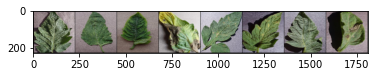

65724391


In [ ]:
%matplotlib inline

# function to show an image
def imshow(img):
  #img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter1 = iter(train_loaders)
images, labels = next(dataiter1)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(''.join('%1s' % labels[j].numpy() for j in range(8)))

# Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F #
#Creating Model
class Net(nn.Module):


  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(5,5), stride=(1,1), padding=(0,0)) # 1st CNN layer 32 filters of 3X3 size, with stride of 1 and padding of 0
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2))
    #self.batch_norm1 = nn.BatchNorm2d(num_features=8)
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(1,1))
    self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2))
    #self.batch_norm2 = nn.BatchNorm2d(num_features=16)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5,5), stride=(1,1), padding=(0,0))
    self.pool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2,2))
    self.fc1 = nn.Linear(32*25*25, 15000)
    self.fc2 = nn.Linear(15000, 10000)
    self.fc3 = nn.Linear(10000, 5000)
    self.fc4 = nn.Linear(5000, 1000)
    self.fc5 = nn.Linear(1000, 500)
    self.fc6 = nn.Linear(500, 10)
   # self.dropout = nn.Dropout(0.20)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    #print("After pool 1", x.shape)
    #x = self.dropout(x)
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.pool3(F.relu(self.conv3(x)))
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))


    return x

net = Net()
net.to(device)
print(net)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20000, out_features=15000, bias=True)
  (fc2): Linear(in_features=15000, out_features=10000, bias=True)
  (fc3): Linear(in_features=10000, out_features=5000, bias=True)
  (fc4): Linear(in_features=5000, out_features=1000, bias=True)
  (fc5): Linear(in_features=1000, out_features=500, bias=True)
  (fc6): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
from torchsummary import summary
net.to(device)
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 220, 220]             608
         MaxPool2d-2          [-1, 8, 110, 110]               0
            Conv2d-3         [-1, 16, 108, 108]           3,216
         MaxPool2d-4           [-1, 16, 54, 54]               0
            Conv2d-5           [-1, 32, 50, 50]          12,832
         MaxPool2d-6           [-1, 32, 25, 25]               0
            Linear-7                [-1, 15000]     300,015,000
            Linear-8                [-1, 10000]     150,010,000
            Linear-9                 [-1, 5000]      50,005,000
           Linear-10                 [-1, 1000]       5,001,000
           Linear-11                  [-1, 500]         500,500
           Linear-12                   [-1, 10]           5,010
Total params: 505,553,166
Trainable params: 505,553,166
Non-trainable params: 0
-----------------------

#Training Model Net


In [ ]:
from torch.autograd import Variable
epoch_log_net=[]
loss_log_net=[]
accuracy_log_net=[]

def saveModelnet():
  path1 = "./tomato_net.pth"
  torch.save(net.state_dict(),path1)

def validationAccuracynet():

  net.eval()
  accuracy = 0.0
  total = 0.0

  with torch.no_grad():
    for data in valid_loaders:
      images, labels = data
      images, labels = images.to(device), labels.to(device)

      outputs = net(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy += (predicted == labels).sum().item()

  accuracy = (100 * accuracy / total)
  return(accuracy)



def trainnet(num_epochs):
  best_accuracy = 0.0
  net.to(device)

  for epoch in range(num_epochs):
    t0 = time.time()
    running_loss = 0.0
    running_accuracy = 0.0

    for i, (images, labels) in enumerate(train_loaders, 0):
      images = Variable(images.to(device))
      labels = Variable(labels.to(device))

      criterion = nn.CrossEntropyLoss()
      optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

      optimizer.zero_grad()
      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 1000 == 999:
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
        running_loss = 0.0

    accuracy = validationAccuracynet()
    actual_loss = running_loss/1000
    epoch_log_net.append(epoch)
    loss_log_net.append(actual_loss)
    accuracy_log_net.append(accuracy)
    print('For epoch', epoch+1,'the validation accuracy over the whole validation set is %d %% time taken - %.3f' % (accuracy, time.time()-t0))


    if accuracy > best_accuracy:
      saveModelnet()
      best_accuracy = accuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imageshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


def validationBatchnet():
  images, labels = next(iter(valid_loaders))
  imageshow(torchvision.utils.make_grid(images))
  outputs = net(images.to(device))
  _, predicted = torch.max(outputs, 1)

[1,  1000] loss: 2.201
For epoch 1 the validation accuracy over the whole validation set is 28 % time taken - 3874.145
[2,  1000] loss: 2.160
For epoch 2 the validation accuracy over the whole validation set is 39 % time taken - 276.746
[3,  1000] loss: 1.654
For epoch 3 the validation accuracy over the whole validation set is 61 % time taken - 278.242
[4,  1000] loss: 1.253
For epoch 4 the validation accuracy over the whole validation set is 63 % time taken - 276.038
[5,  1000] loss: 1.012
For epoch 5 the validation accuracy over the whole validation set is 68 % time taken - 276.353
[6,  1000] loss: 0.856
For epoch 6 the validation accuracy over the whole validation set is 74 % time taken - 275.517
[7,  1000] loss: 0.718
For epoch 7 the validation accuracy over the whole validation set is 70 % time taken - 276.334
[8,  1000] loss: 0.599
For epoch 8 the validation accuracy over the whole validation set is 78 % time taken - 275.861
[9,  1000] loss: 0.483
For epoch 9 the validation accur

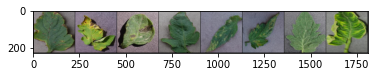

In [ ]:
if __name__== "__main__":
  trainnet(30)
  print('Finished Training .... ')

  net = Net()
  net.to(device)
  path1 = "./tomato_net.pth"
  net.load_state_dict(torch.load(path1))

  validationBatchnet()


In [ ]:
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in valid_loaders:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the {valid} validation images: {accuracy:.3}%')

Accuracy of the network on the 1892 validation images: 90.2%


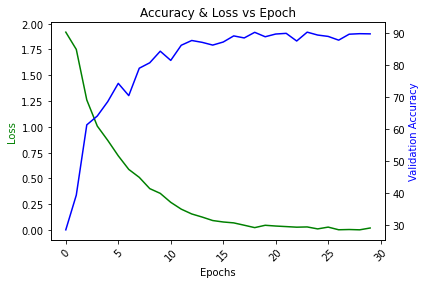

In [ ]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log_net, loss_log_net, 'g-')
ax2.plot(epoch_log_net, accuracy_log_net, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Validation Accuracy', color='b')

plt.show()

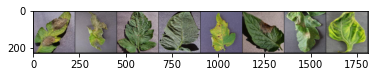

Ground Truth:  2, 2, 6, 9, 4, 2, 2, 7
Predicted:  2, 2, 6, 9, 4, 2, 2, 7


In [ ]:
dataiter = iter(test_loaders)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ', '.join('%1s' % labels[j].cpu().numpy() for j in range(8)))

images = images.to(device)
labels = labels.to(device)
output = net(images)
_, predicted = torch.max(output, 1)
print('Predicted: ',', '.join('%1s' % labels[j].cpu().numpy() for j in range(8)))


In [ ]:
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loaders:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the {test} test images: {accuracy:.3}%')

Accuracy of the network on the 1903 test images: 90.8%


In [ ]:
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for x_batch, y_batch in test_loaders:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_test_pred = net(x_batch)
        _, y_pred_tag = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

In [ ]:
y_pred_list = [i[0] for i in y_pred_list]
y_true_list = [i[0] for i in y_true_list]

In [ ]:
# initialize a confusion matrix with 0s
confusion_matrix = torch.zeros(10, 10, dtype=torch.int32)
print(confusion_matrix.numpy())

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_list, y_pred_list, target_names = test_data.classes))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.87      1.00      0.93        26
                        Tomato___Early_blight       0.80      0.50      0.62        16
                         Tomato___Late_blight       0.71      0.89      0.79        19
                           Tomato___Leaf_Mold       1.00      0.80      0.89        15
                  Tomato___Septoria_leaf_spot       0.88      0.78      0.82        27
Tomato___Spider_mites Two-spotted_spider_mite       0.96      0.76      0.85        29
                         Tomato___Target_Spot       0.67      0.89      0.76        18
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      1.00      0.98        64
                 Tomato___Tomato_mosaic_virus       0.89      1.00      0.94         8
                             Tomato___healthy       1.00      1.00      1.00        15

                                     accu

In [ ]:
print(confusion_matrix(y_true_list, y_pred_list))

[[26  0  0  0  0  0  0  0  0  0]
 [ 1  8  3  0  2  0  1  0  1  0]
 [ 1  0 17  0  0  1  0  0  0  0]
 [ 0  1  0 12  1  0  1  0  0  0]
 [ 0  1  2  0 21  0  1  2  0  0]
 [ 1  0  1  0  0 22  5  0  0  0]
 [ 1  0  1  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


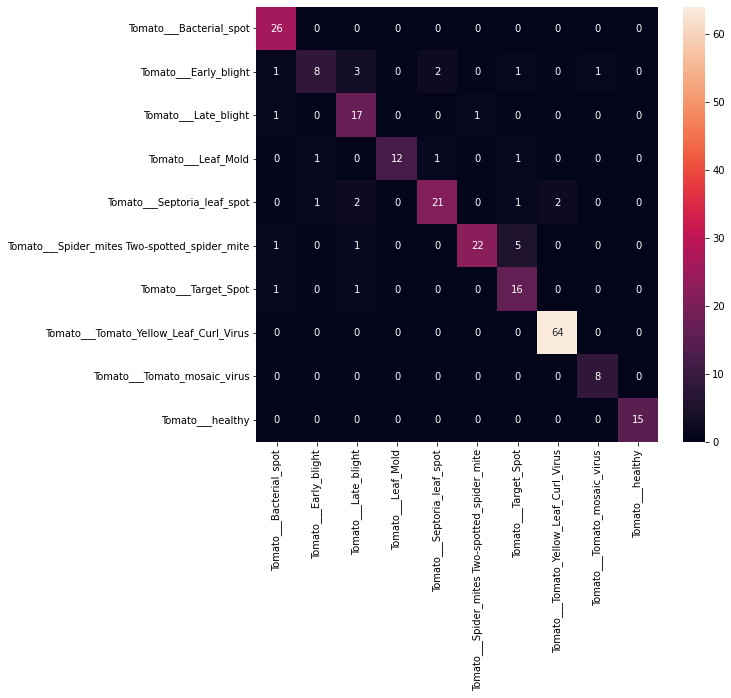

In [ ]:
import pandas as pd
import seaborn as sns
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true_list, y_pred_list), index = [i for i in test_data.classes] , columns = [i for i in test_data.classes])
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)

GPU Used

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8c330579-de35-ce18-ab34-3ccf1a4a9d2a)


In [ ]:
!nvidia-smi

Wed Feb 22 16:44:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    29W /  70W |   6982MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------